# Gold Price Prediction PJT

Gold is one of the most precious metals on earth. 

For many years it was treated as currency before the paper money appeared.

Demand for the gold is visible in technology, jewelery & investment sector. 

Gold investment is very popular that is why it's price prediction is tempting because it can help to decide when buy/sell it.


# Data

In this project will be used data from Kaggle ('Gold Price Prediction Dataset' competition).

Dataset includes Gold ETF price and it's potential predictors, from period 2011-12-15 to 2018-12-31 and it base on Yahoo finance website.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from zipfile import ZipFile
import selenium
from selenium import webdriver

# 1. Gathering dataset from Kaggle competition

In this step will be used Selenium with webdriver dedicated for Firefox

In [2]:
driver = webdriver.Firefox(executable_path=r'C:\Users\Michał\Desktop\Zjazd 0 (pozostałe pliki)\geckodriver.exe')

C:\Users\MICHA~1\AppData\Local\Temp/ipykernel_12988/4022084092.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path=r'C:\Users\Michał\Desktop\Zjazd 0 (pozostałe pliki)\geckodriver.exe')


--------------------------------------------------------------------------------------------------------

# Notice

Dear code reviewer, please remember that in next lines of code, there is a test username & password for Kaggle.

Please, use it only during code verification!

--------------------------------------------------------------------------------------------------------

In [3]:
driver.get('https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset')

In [4]:
sign_in_button = driver.find_element_by_xpath('/html/body/main/div[1]/div/div[4]/div[2]/div[2]/div/div[1]/a/button/span')
sign_in_button.click()

C:\Users\MICHA~1\AppData\Local\Temp/ipykernel_12988/1889937747.py:1: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  sign_in_button = driver.find_element_by_xpath('/html/body/main/div[1]/div/div[4]/div[2]/div[2]/div/div[1]/a/button/span')


In [5]:
sign_in_email_button = driver.find_element_by_xpath('/html/body/main/div[1]/div/div[3]/form/div[2]/div/div[2]/a/li/div/span')
sign_in_email_button.click()

C:\Users\MICHA~1\AppData\Local\Temp/ipykernel_12988/4256043125.py:1: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  sign_in_email_button = driver.find_element_by_xpath('/html/body/main/div[1]/div/div[3]/form/div[2]/div/div[2]/a/li/div/span')


In [6]:
username = driver.find_element_by_xpath('/html/body/main/div[1]/div/div[3]/form/div[2]/div[1]/div/label/input')
username.send_keys('plmn0@proton.me')

C:\Users\MICHA~1\AppData\Local\Temp/ipykernel_12988/219564754.py:1: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  username = driver.find_element_by_xpath('/html/body/main/div[1]/div/div[3]/form/div[2]/div[1]/div/label/input')


In [7]:
password = driver.find_element_by_xpath('/html/body/main/div[1]/div/div[3]/form/div[2]/div[2]/div/label/input')
password.send_keys('DataSciencePJT#1')

C:\Users\MICHA~1\AppData\Local\Temp/ipykernel_12988/2855171521.py:1: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  password = driver.find_element_by_xpath('/html/body/main/div[1]/div/div[3]/form/div[2]/div[2]/div/label/input')


In [8]:
sign_in_email_button2 = driver.find_element_by_xpath('/html/body/main/div[1]/div/div[3]/form/div[2]/div[3]/button/span')
sign_in_email_button2.click()

C:\Users\MICHA~1\AppData\Local\Temp/ipykernel_12988/3602179500.py:1: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  sign_in_email_button2 = driver.find_element_by_xpath('/html/body/main/div[1]/div/div[3]/form/div[2]/div[3]/button/span')


In [9]:
download_button = driver.find_element_by_xpath('/html/body/main/div[1]/div/div[6]/div[2]/div[2]/div/div[1]/div/a/button/span')
download_button.click()

C:\Users\MICHA~1\AppData\Local\Temp/ipykernel_12988/1203076272.py:1: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  download_button = driver.find_element_by_xpath('/html/body/main/div[1]/div/div[6]/div[2]/div[2]/div/div[1]/div/a/button/span')


In [10]:
driver.close()

--------------------------------------------------------------------------------------------------------

# 2. Preparing dataset

Steps:
1. Unzipping dataset
2. Lack of values check
3. Setting our 'y' value - removal of columns which represent Gold ETF price from different part of the day during market session due to high correlation
4. 'Date' column formatting to a 'datetime'
5. Removal of highly correlated potential predictors to avoid multicolienarity

--------------------------------------------------------------------------------------------------------

In [11]:
df = pd.read_csv('C:\\Users\\Michał\\Downloads\\archive.zip',compression='zip')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [12]:
df.info()

# lack of null values, every column has the same number of rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [13]:
df.drop(df.columns[[1, 2, 3, 4]], axis=1, inplace=True)
df.rename(columns = {'Adj Close': 'Y_GLD'}, inplace = True)
df['Date'] = pd.to_datetime(df['Date'])

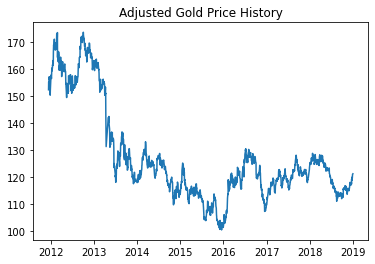

In [14]:
plt.plot(df['Date'], df['Y_GLD'])
plt.title('Adjusted Gold Price History')
plt.show()

In [15]:
df_no_Y = df.drop('Y_GLD', axis = 1)
corr_matrix = df_no_Y.corr().abs()
corr_matrix

,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Volume,1.000000,0.218726,0.216355,0.223317,0.220631,0.208594,0.383677,0.195832,0.194437,0.201206,...,0.241727,0.248752,0.250313,0.302225,0.082632,0.083064,0.080475,0.081642,0.081642,0.069580
SP_open,0.218726,1.000000,0.999792,0.999642,0.999461,0.998422,0.411961,0.986895,0.986533,0.987039,...,0.690565,0.694140,0.678071,0.324907,0.772902,0.774626,0.771235,0.773099,0.773099,0.375568
SP_high,0.216355,0.999792,1.000000,0.999511,0.999655,0.998721,0.404764,0.986949,0.986917,0.987099,...,0.691524,0.695013,0.678957,0.326542,0.773843,0.775482,0.772154,0.773957,0.773957,0.377996
SP_low,0.223317,0.999642,0.999511,1.000000,0.999749,0.998452,0.426872,0.986162,0.985829,0.986956,...,0.689003,0.692579,0.676464,0.321351,0.771867,0.773550,0.770087,0.771928,0.771928,0.371390
SP_close,0.220631,0.999461,0.999655,0.999749,1.000000,0.998841,0.418848,0.986178,0.986169,0.986912,...,0.690145,0.693610,0.677507,0.323515,0.773177,0.774799,0.771396,0.773159,0.773159,0.374658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USO_High,0.083064,0.774626,0.775482,0.773550,0.774799,0.786760,0.255344,0.723275,0.723594,0.722477,...,0.614587,0.614766,0.600523,0.522581,0.999857,1.000000,0.999818,0.999867,0.999867,0.695678
USO_Low,0.080475,0.771235,0.772154,0.770087,0.771396,0.783347,0.249038,0.719607,0.719975,0.718726,...,0.613844,0.613931,0.599819,0.523956,0.999848,0.999818,1.000000,0.999879,0.999879,0.702665
USO_Close,0.081642,0.773099,0.773957,0.771928,0.773159,0.785103,0.251419,0.721539,0.721857,0.720646,...,0.614733,0.614915,0.600756,0.523801,0.999699,0.999867,0.999879,1.000000,1.000000,0.699221
USO_Adj Close,0.081642,0.773099,0.773957,0.771928,0.773159,0.785103,0.251419,0.721539,0.721857,0.720646,...,0.614733,0.614915,0.600756,0.523801,0.999699,0.999867,0.999879,1.000000,1.000000,0.699221


In [16]:
high_x_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
print(high_x_corr)

               Volume   SP_open   SP_high    SP_low  SP_close  SP_Ajclose  \
Volume            NaN  0.218726  0.216355  0.223317  0.220631    0.208594   
SP_open           NaN       NaN  0.999792  0.999642  0.999461    0.998422   
SP_high           NaN       NaN       NaN  0.999511  0.999655    0.998721   
SP_low            NaN       NaN       NaN       NaN  0.999749    0.998452   
SP_close          NaN       NaN       NaN       NaN       NaN    0.998841   
...               ...       ...       ...       ...       ...         ...   
USO_High          NaN       NaN       NaN       NaN       NaN         NaN   
USO_Low           NaN       NaN       NaN       NaN       NaN         NaN   
USO_Close         NaN       NaN       NaN       NaN       NaN         NaN   
USO_Adj Close     NaN       NaN       NaN       NaN       NaN         NaN   
USO_Volume        NaN       NaN       NaN       NaN       NaN         NaN   

               SP_volume   DJ_open   DJ_high    DJ_low  ...   GDX_Low  \
Vo

C:\Users\MICHA~1\AppData\Local\Temp/ipykernel_12988/3554644027.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  high_x_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


In [17]:
to_drop = [column for column in high_x_corr.columns if any(high_x_corr[column] > 0.95)]
print(to_drop)

['SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EU_open', 'EU_high', 'EU_low', 'OF_Open', 'OF_High', 'OF_Low', 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'SF_Open', 'SF_High', 'SF_Low', 'USB_Open', 'USB_High', 'USB_Low', 'PLT_Open', 'PLT_High', 'PLT_Low', 'PLD_Open', 'PLD_High', 'PLD_Low', 'USDI_Price', 'USDI_Open', 'USDI_High', 'USDI_Low', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close']


In [18]:
df_no_Y = df_no_Y.drop(['Date', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'DJ_open', 'DJ_high', 
              'DJ_low', 'DJ_close', 'EG_high', 'EG_low', 'EG_close', 
              'EU_high', 'EU_low', 'OF_High', 'OF_Low', 'OS_Open', 
              'OS_High', 'OS_Low', 'SF_High', 'SF_Low', 'USB_High', 
              'USB_Low', 'PLT_High', 'PLT_Low', 'PLD_High', 'PLD_Low', 
              'USDI_Open', 'USDI_High', 'USDI_Low', 'GDX_High', 
              'GDX_Low', 'GDX_Close', 'USO_Open', 'USO_High', 'USO_Low', 
              'USO_Close'], 1)

C:\Users\MICHA~1\AppData\Local\Temp/ipykernel_12988/786517792.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_no_Y = df_no_Y.drop(['Date', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'DJ_open', 'DJ_high',


In [19]:
df_no_Y = pd.get_dummies(df_no_Y)

--------------------------------------------------------------------------------------------------------

# 3. Working with models

For every model has been calculated the same metrics to allow comparison:
- R^2 - very popular metric used for evaluating the performance of regression models.
- MSE - Mean Average Error, uses Euclidean distance to calculate the error.
- MAPE - Meane Average Percentage Error, uses Manhattan distance to calculate the error.

--------------------------------------------------------------------------------------------------------

# Ridge

Firstly will be used simple regression model named Ridge to compare it to more complex models.

In [20]:
X1 = df_no_Y
y = df['Y_GLD']

In [21]:
# This split for a test & train subsets will be used in other models

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, random_state = 42, test_size=0.2)

In [22]:
ridge_model = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, 
                   normalize=False, random_state=1858, solver='auto', tol=0.001)

In [23]:
ridge_model_fit = ridge_model.fit(X1_train, y_train)
ridge_model_predict = ridge_model_fit.predict(X1_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.39281e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [24]:
r2 = r2_score(ridge_model_predict, y_test)
MSE = mean_squared_error(y_test, ridge_model_predict)
MAPE = mean_absolute_percentage_error(ridge_model_predict, y_test)

In [25]:
print(f"R2: {r2}")
print(f"MSE: {MSE}")
print(f"MAPE: {MAPE}")

R2: 0.9841745442630263
MSE: 4.877860542093268
MAPE: 0.01394624677639101


# Random Forest Regression

Random Forest Regression is an alternative for of regression. In the case of a regression problem, with the use of multiple decision trees, the final output is the mean of all the outputs.

In [26]:
rfr_model = RandomForestRegressor(n_estimators = 100, 
                              max_features = 'sqrt', 
                              random_state = 18, 
                              max_depth = 5).fit(X1_train, y_train)

In [27]:
rfr_predict = rfr_model.predict(X1_test)

In [28]:
r2_rfr = r2_score(rfr_predict, y_test)
MSE_rfr = mean_squared_error(y_test, rfr_predict)
MAPE_rfr = mean_absolute_percentage_error(rfr_predict, y_test)

In [29]:
print(f"R2: {r2_rfr}")
print(f"MSE: {MSE_rfr}")
print(f"MAPE: {MAPE_rfr}")

R2: 0.9852625814090572
MSE: 4.399918227053712
MAPE: 0.013035869077005085


# MLP

Multilayer perceptors known as feed-forward neural networks type, can be seen as a generalization of linear models that perform multiple processing steps for forecasting.

In [30]:
scaler = StandardScaler()
X1_train_sc = scaler.fit_transform(X1_train)
X1_test_sc = scaler.transform(X1_test)

In [31]:
MLP_model = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16, 8, 4),
    activation='identity',
    solver='adam',
    random_state=42,
    max_iter=1000,
    batch_size=64)

MLP_model.fit(X1_train_sc, y_train)

MLPRegressor(activation='identity', batch_size=64,
             hidden_layer_sizes=(64, 32, 16, 8, 4), max_iter=1000,
             random_state=42)

In [32]:
MLP_predict = MLP_model.predict(X1_test_sc)

In [33]:
r2_MLP = r2_score(MLP_predict, y_test)
MSE_MLP = mean_squared_error(y_test, MLP_predict)
MAPE_MLP = mean_absolute_percentage_error(MLP_predict, y_test)

In [34]:
print(f"R2: {r2_MLP}")
print(f"MSE: {MSE_MLP}")
print(f"MAPE: {MAPE_MLP}")

R2: 0.9807103642464932
MSE: 6.341116615671143
MAPE: 0.015979890701035365


# Summary

As we can se below, the difference between these 3 models is not so big. 

To predict the price of GLD ETF could be used Random Forest Regression model because of highest R^2 value and lowest MSE.

In [35]:
index_labels = ['R2', 'MSE', 'MAPE']

results_df = pd.DataFrame([[r2,r2_rfr,r2_MLP], 
                           [MSE, MSE_rfr, MSE_MLP], 
                           [MAPE, MAPE_rfr, MAPE_MLP]], 
                          columns = ['Ridge','Random Forest Regression','MLP'], index = index_labels)

results_df

,Ridge,Random Forest Regression,MLP
R2,0.984175,0.985263,0.980710
MSE,4.877861,4.399918,6.341117
MAPE,0.013946,0.013036,0.015980


In [36]:
index = pd.Index(range(1, 345))
summary_df = pd.DataFrame({'y_test':y_test, 'Ridge':ridge_model_predict, 
                           'Random Forest Regression':rfr_predict, 'MLP':MLP_predict})


summary_df = summary_df.set_index(index)

summary_df

,y_test,Ridge,Random Forest Regression,MLP
1,127.699997,126.310070,126.404958,126.640365
2,116.470001,117.835560,118.019889,116.261090
3,157.320007,159.047586,155.018143,159.006143
4,155.089996,156.038240,154.979144,156.919520
5,131.070007,132.446775,129.664240,132.236174
...,...,...,...,...
340,112.610001,111.910206,115.490770,111.232114
341,152.080002,154.474767,154.415889,154.956266
342,117.220001,114.785822,116.140726,113.163431
343,116.410004,114.939936,115.361842,116.764080


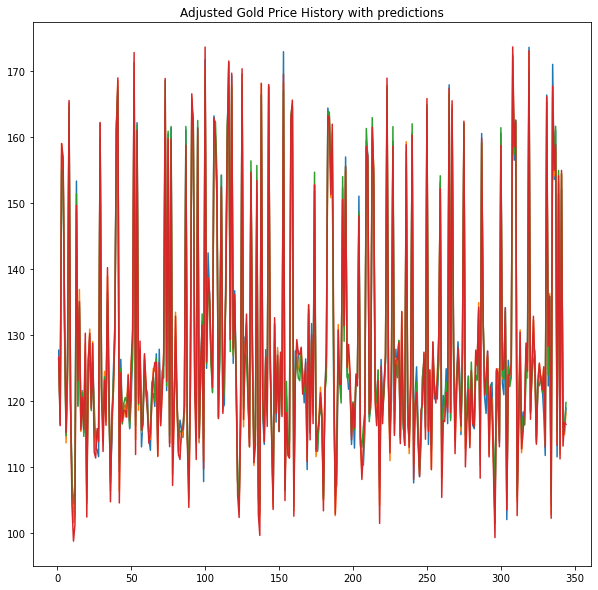

In [37]:
plt.figure(figsize=(10, 10))
plt.plot(summary_df)
plt.title('Adjusted Gold Price History with predictions')
plt.show()